In [1]:
!pip install rouge


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from rouge import Rouge
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [3]:
df = pd.read_csv('financial_questions_answers.csv', encoding='ISO-8859-1')
csv_questions = df['Question'].tolist()
csv_answers = df['Answer'].tolist()

In [4]:
csv_questions[:10]

['What is a stock?',
 'What is a bond?',
 'How does compound interest work?',
 'What is a mutual fund?',
 'What is a 401(k)?',
 'What is an IRA?',
 'What is diversification in investing?',
 'What is a dividend?',
 'What is the stock market?',
 'What is the difference between a bull and a bear market?']

In [5]:
csv_answers[:10]

["A stock is a type of security that represents ownership in a corporation and entitles the holder to a part of the company's profits and assets",
 'A bond is a fixed-income investment in which an investor loans money to an entity that borrows the funds for a defined period of time at a variable or fixed interest rate.',
 'Compound interest is the addition of interest to the principal sum of a loan or deposit, or in other words, interest on interest.',
 'A mutual fund is an investment program funded by shareholders that trades in diversified holdings and is professionally managed.',
 'A 401(k) is a retirement savings plan sponsored by an employer allowing employees to save and invest tax-deferred income.',
 'An Individual Retirement Account (IRA) is a tax-advantaged investing tool for individuals to earmark funds for retirement savings.',
 'Diversification in investing is the process of allocating capital in a way that reduces the exposure to any one particular asset or risk.',
 "A div

In [6]:
questions_1 = [
    "Hi", "Where are you from?", "What languages do you speak?", "Tell me about yourself.", 
    "How do you work?", "What is the meaning of life?", "Can you help me with programming?",
    "Do you like music?", "What's your favorite color?", "What's your favorite movie?",
    "Tell me a fun fact."
]

answers_1 = [
    "How are you?",
    "I don't have a specific place of origin as I'm a program, but I'm here to assist you!",
    "I speak many languages, including Python, Java, and JavaScript.",
    "I'm a virtual assistant designed to help and provide information.",
    "I operate based on algorithms and respond to user input.",
    "The meaning of life is subjective and varies from person to person.",
    "Yes, I can help you with programming. What specifically do you need assistance with?",
    "I don't have personal preferences, but I can appreciate all kinds of music.",
    "I don't have the ability to see colors, but I'm here to assist you!",
    "As a program, I don't watch movies, but I can recommend some based on your preferences.",
    "Sure! Did you know that honey never spoils? Archaeologists have found pots of honey in ancient Egyptian tombs that are over 3,000 years old and still perfectly edible!"
]

additional_questions = [
    "What is AI?", "Who invented the computer?", "Can you tell a joke?", "What's the weather like?",
    "How does a rocket work?", "What is the largest ocean?", "Who wrote Hamlet?", "What is the Eiffel Tower?",
    "How many continents are there?", "What's the capital of France?", "What is quantum computing?",
    "Do you dream?", "Can you play chess?", "What is the speed of light?", "Who is Albert Einstein?",
    "What is the tallest mountain?", "Who painted the Mona Lisa?", "What is the internet?",
    "What are black holes?", "Can you write poems?"
]

additional_answers = [
    "AI, or artificial intelligence, is the simulation of human intelligence processes by machines.",
    "The computer was invented by Charles Babbage.",
    "Sure, why don't scientists trust atoms? Because they make up everything!",
    "I'm not able to access current weather information, but I can help answer questions about weather phenomena!",
    "A rocket works by expelling gas out of its engines, propelling it forward due to Newton's third law of motion.",
    "The Pacific Ocean is the largest ocean on Earth.",
    "William Shakespeare wrote Hamlet.",
    "The Eiffel Tower is a wrought-iron lattice tower in Paris, France, and one of the most famous landmarks in the world.",
    "There are seven continents on Earth.",
    "The capital of France is Paris.",
    "Quantum computing is a type of computing that uses quantum-mechanical phenomena, such as superposition and entanglement.",
    "As an AI, I don't dream. I process data and provide responses based on algorithms.",
    "I can't play chess, but I can provide information about it or help with strategy!",
    "The speed of light in a vacuum is approximately 299,792 kilometers per second.",
    "Albert Einstein was a theoretical physicist who developed the theory of relativity.",
    "Mount Everest is known as the tallest mountain above sea level.",
    "Leonardo da Vinci painted the Mona Lisa.",
    "The internet is a global network of interconnected computers that use the Internet protocol suite to communicate.",
    "Black holes are regions in space where the gravitational pull is so strong that nothing, not even light, can escape from it.",
    "I can try writing poems. Roses are red, violets are blue, ask me a question, and I'll answer you!"
]



In [7]:
# Combine original and additional questions and answers
questions = questions_1 + additional_questions + csv_questions
answers = answers_1 + additional_answers + csv_answers

# Add start and end tokens to the answers
answers = ['start ' + text + ' end' for text in answers]

In [8]:
questions

['Hi',
 'Where are you from?',
 'What languages do you speak?',
 'Tell me about yourself.',
 'How do you work?',
 'What is the meaning of life?',
 'Can you help me with programming?',
 'Do you like music?',
 "What's your favorite color?",
 "What's your favorite movie?",
 'Tell me a fun fact.',
 'What is AI?',
 'Who invented the computer?',
 'Can you tell a joke?',
 "What's the weather like?",
 'How does a rocket work?',
 'What is the largest ocean?',
 'Who wrote Hamlet?',
 'What is the Eiffel Tower?',
 'How many continents are there?',
 "What's the capital of France?",
 'What is quantum computing?',
 'Do you dream?',
 'Can you play chess?',
 'What is the speed of light?',
 'Who is Albert Einstein?',
 'What is the tallest mountain?',
 'Who painted the Mona Lisa?',
 'What is the internet?',
 'What are black holes?',
 'Can you write poems?',
 'What is a stock?',
 'What is a bond?',
 'How does compound interest work?',
 'What is a mutual fund?',
 'What is a 401(k)?',
 'What is an IRA?',
 '

In [9]:
answers

['start How are you? end',
 "start I don't have a specific place of origin as I'm a program, but I'm here to assist you! end",
 'start I speak many languages, including Python, Java, and JavaScript. end',
 "start I'm a virtual assistant designed to help and provide information. end",
 'start I operate based on algorithms and respond to user input. end',
 'start The meaning of life is subjective and varies from person to person. end',
 'start Yes, I can help you with programming. What specifically do you need assistance with? end',
 "start I don't have personal preferences, but I can appreciate all kinds of music. end",
 "start I don't have the ability to see colors, but I'm here to assist you! end",
 "start As a program, I don't watch movies, but I can recommend some based on your preferences. end",
 'start Sure! Did you know that honey never spoils? Archaeologists have found pots of honey in ancient Egyptian tombs that are over 3,000 years old and still perfectly edible! end',
 'start

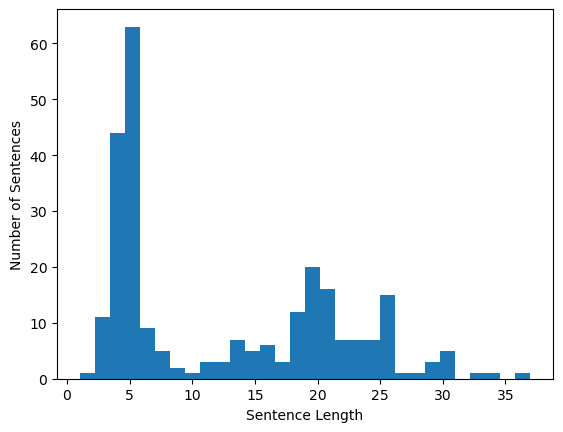

In [10]:
# Assuming you have loaded your questions and answers into lists `questions` and `answers`
all_sentences = questions + answers  # Combine all sentences for analysis
sentence_lengths = [len(sentence.split()) for sentence in all_sentences]

# Plot the distribution
plt.hist(sentence_lengths, bins=30)
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.show()

In [11]:
# Tokenize questions and answers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions + answers)

tokenized_questions = tokenizer.texts_to_sequences(questions)
tokenized_answers = tokenizer.texts_to_sequences(answers)

In [12]:
tokenized_questions

[[381],
 [82, 22, 23, 39],
 [6, 206, 50, 23, 207],
 [130, 100, 131, 382],
 [40, 50, 23, 132],
 [6, 2, 5, 208, 7, 209],
 [27, 23, 83, 100, 35, 210],
 [50, 23, 133, 211],
 [101, 102, 212, 383],
 [101, 102, 212, 384],
 [130, 100, 1, 385, 386],
 [6, 2, 134],
 [46, 213, 5, 214],
 [27, 23, 130, 1, 387],
 [101, 5, 135, 133],
 [40, 136, 1, 215, 132],
 [6, 2, 5, 137, 138],
 [46, 216, 217],
 [6, 2, 5, 218, 139],
 [40, 140, 219, 22, 220],
 [101, 5, 84, 7, 141],
 [6, 2, 142, 143],
 [50, 23, 221],
 [27, 23, 222, 223],
 [6, 2, 5, 224, 7, 144],
 [46, 2, 225, 226],
 [6, 2, 5, 227, 228],
 [46, 229, 5, 230, 231],
 [6, 2, 5, 103],
 [6, 22, 232, 233],
 [27, 23, 388, 234],
 [6, 2, 1, 14],
 [6, 2, 1, 26],
 [40, 136, 235, 19, 132],
 [6, 2, 1, 62, 30],
 [6, 2, 1, 236, 237],
 [6, 2, 12, 238],
 [6, 2, 239, 10, 104],
 [6, 2, 1, 105],
 [6, 2, 5, 14, 17],
 [6, 2, 5, 240, 241, 1, 106, 8, 1, 107, 17],
 [6, 2, 1, 242, 30],
 [6, 2, 12, 51, 30],
 [6, 22, 243],
 [6, 2, 1, 145],
 [40, 50, 244, 389, 146],
 [6, 2, 1, 15, 2

In [13]:
tokenized_answers

[[4, 40, 22, 23, 3],
 [4,
  24,
  70,
  71,
  1,
  92,
  391,
  7,
  392,
  28,
  93,
  1,
  162,
  54,
  93,
  288,
  9,
  289,
  23,
  3],
 [4, 24, 207, 140, 206, 393, 394, 395, 8, 396, 3],
 [4, 93, 1, 290, 397, 398, 9, 83, 8, 163, 120, 3],
 [4, 24, 291, 47, 16, 292, 8, 399, 9, 400, 401, 3],
 [4, 5, 208, 7, 209, 2, 402, 8, 403, 39, 293, 9, 293, 3],
 [4, 404, 24, 27, 83, 23, 35, 210, 6, 405, 50, 23, 406, 407, 35, 3],
 [4, 24, 70, 71, 408, 294, 54, 24, 27, 409, 164, 410, 7, 211, 3],
 [4, 24, 70, 71, 5, 295, 9, 411, 412, 54, 93, 288, 9, 289, 23, 3],
 [4, 28, 1, 162, 24, 70, 413, 414, 54, 24, 27, 415, 296, 47, 16, 102, 294, 3],
 [4,
  297,
  416,
  23,
  417,
  13,
  298,
  418,
  419,
  420,
  71,
  421,
  422,
  7,
  298,
  10,
  423,
  424,
  425,
  13,
  22,
  94,
  426,
  427,
  165,
  428,
  8,
  429,
  430,
  431,
  3],
 [4, 134, 11, 432, 299, 2, 5, 433, 7, 434, 299, 435, 18, 436, 3],
 [4, 5, 214, 300, 213, 18, 437, 438, 3],
 [4, 297, 439, 70, 440, 441, 442, 443, 444, 301, 445, 44

In [14]:
# Decide on max_sequence_length based on the distribution
#max_sequence_length = int(np.percentile(sentence_lengths, 95))  # for example, the 95th percentile

In [15]:
max_sequence_length=100

In [16]:
# Pad sequences
padded_questions = pad_sequences(tokenized_questions, maxlen=max_sequence_length, padding='post')
padded_answers = pad_sequences(tokenized_answers, maxlen=max_sequence_length, padding='post')

In [17]:
padded_questions

array([[381,   0,   0, ...,   0,   0,   0],
       [ 82,  22,  23, ...,   0,   0,   0],
       [  6, 206,  50, ...,   0,   0,   0],
       ...,
       [  6,   2,   1, ...,   0,   0,   0],
       [  6,   2,  90, ...,   0,   0,   0],
       [  6,   2,   1, ...,   0,   0,   0]])

In [18]:
padded_answers

array([[  4,  40,  22, ...,   0,   0,   0],
       [  4,  24,  70, ...,   0,   0,   0],
       [  4,  24, 207, ...,   0,   0,   0],
       ...,
       [  4,   1, 287, ...,   0,   0,   0],
       [  4,  90,  19, ...,   0,   0,   0],
       [  4,   1,  14, ...,   0,   0,   0]])

In [19]:
# Model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 32
units = 32

In [20]:
# Encoder
encoder_inputs = Input(shape=(max_sequence_length,))
encoder_embedding = Embedding(vocab_size, embedding_dim, mask_zero=True)(encoder_inputs)
encoder_lstm = LSTM(units, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_sequence_length,))
decoder_embedding_layer = Embedding(vocab_size, embedding_dim, mask_zero=True)
decoder_embedding = decoder_embedding_layer(decoder_inputs)
decoder_lstm = LSTM(units, return_sequences=True, return_state=True)
decoder_dense = Dense(vocab_size, activation='softmax')

decoder_lstm_output, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_outputs = decoder_dense(decoder_lstm_output)

In [21]:
# Model definition and compilation
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 32)      26944       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 32)      26944       ['input_2[0][0]']                
                                                                                              

In [22]:
# Training data preparation
padded_answers_shifted = np.concatenate([padded_answers[:, 1:], np.zeros((len(padded_answers), 1))], axis=1)
padded_answers_shifted = np.expand_dims(padded_answers_shifted, -1)

# Train the model
#model.fit([padded_questions, padded_answers], padded_answers_shifted, epochs=150, verbose=1)
history = model.fit([padded_questions, padded_answers], padded_answers_shifted, 
                    epochs=250, verbose=1)

Epoch 1/250
5/5 [==============================] - 14s 159ms/step - loss: 6.7167 - accuracy: 0.0756
Epoch 2/250
5/5 [==============================] - 1s 159ms/step - loss: 6.2510 - accuracy: 0.0476
Epoch 3/250
5/5 [==============================] - 1s 159ms/step - loss: 5.5943 - accuracy: 0.0650
Epoch 4/250
5/5 [==============================] - 1s 157ms/step - loss: 5.5881 - accuracy: 0.0718
Epoch 5/250
5/5 [==============================] - 1s 160ms/step - loss: 5.4822 - accuracy: 0.0918
Epoch 6/250
5/5 [==============================] - 1s 161ms/step - loss: 5.3993 - accuracy: 0.1104
Epoch 7/250
5/5 [==============================] - 1s 159ms/step - loss: 5.3218 - accuracy: 0.0983
Epoch 8/250
5/5 [==============================] - 1s 159ms/step - loss: 5.1998 - accuracy: 0.1028
Epoch 9/250
5/5 [==============================] - 1s 160ms/step - loss: 5.0804 - accuracy: 0.1085
Epoch 10/250
5/5 [==============================] - 1s 158ms/step - loss: 4.9876 - accuracy: 0.1051
Epoch 11

5/5 [==============================] - 1s 166ms/step - loss: 1.8924 - accuracy: 0.5918
Epoch 84/250
5/5 [==============================] - 1s 166ms/step - loss: 1.8644 - accuracy: 0.6020
Epoch 85/250
5/5 [==============================] - 1s 160ms/step - loss: 1.8387 - accuracy: 0.6077
Epoch 86/250
5/5 [==============================] - 1s 162ms/step - loss: 1.8173 - accuracy: 0.6179
Epoch 87/250
5/5 [==============================] - 1s 162ms/step - loss: 1.7915 - accuracy: 0.6187
Epoch 88/250
5/5 [==============================] - 1s 167ms/step - loss: 1.7666 - accuracy: 0.6190
Epoch 89/250
5/5 [==============================] - 1s 161ms/step - loss: 1.7431 - accuracy: 0.6262
Epoch 90/250
5/5 [==============================] - 1s 159ms/step - loss: 1.7143 - accuracy: 0.6311
Epoch 91/250
5/5 [==============================] - 1s 157ms/step - loss: 1.6973 - accuracy: 0.6311
Epoch 92/250
5/5 [==============================] - 1s 167ms/step - loss: 1.6731 - accuracy: 0.6387
Epoch 93/250


5/5 [==============================] - 1s 156ms/step - loss: 0.8420 - accuracy: 0.8057
Epoch 165/250
5/5 [==============================] - 1s 155ms/step - loss: 0.8336 - accuracy: 0.8099
Epoch 166/250
5/5 [==============================] - 1s 155ms/step - loss: 0.8352 - accuracy: 0.8088
Epoch 167/250
5/5 [==============================] - 1s 159ms/step - loss: 0.8292 - accuracy: 0.8091
Epoch 168/250
5/5 [==============================] - 1s 157ms/step - loss: 0.8164 - accuracy: 0.8141
Epoch 169/250
5/5 [==============================] - 1s 161ms/step - loss: 0.8097 - accuracy: 0.8163
Epoch 170/250
5/5 [==============================] - 1s 155ms/step - loss: 0.8029 - accuracy: 0.8209
Epoch 171/250
5/5 [==============================] - 1s 157ms/step - loss: 0.7935 - accuracy: 0.8228
Epoch 172/250
5/5 [==============================] - 1s 161ms/step - loss: 0.7874 - accuracy: 0.8250
Epoch 173/250
5/5 [==============================] - 1s 158ms/step - loss: 0.7828 - accuracy: 0.8269
Epoc

5/5 [==============================] - 1s 160ms/step - loss: 0.4642 - accuracy: 0.9025
Epoch 246/250
5/5 [==============================] - 1s 154ms/step - loss: 0.4607 - accuracy: 0.9044
Epoch 247/250
5/5 [==============================] - 1s 157ms/step - loss: 0.4613 - accuracy: 0.9044
Epoch 248/250
5/5 [==============================] - 1s 159ms/step - loss: 0.4570 - accuracy: 0.9078
Epoch 249/250
5/5 [==============================] - 1s 161ms/step - loss: 0.4533 - accuracy: 0.9082
Epoch 250/250
5/5 [==============================] - 1s 158ms/step - loss: 0.4488 - accuracy: 0.9082


In [23]:
# Inference models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(units,))
decoder_state_input_c = Input(shape=(units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_embedding_inference = decoder_embedding_layer(decoder_inputs)
decoder_lstm_output, state_h, state_c = decoder_lstm(decoder_embedding_inference, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_output = decoder_dense(decoder_lstm_output)

decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_output] + decoder_states)

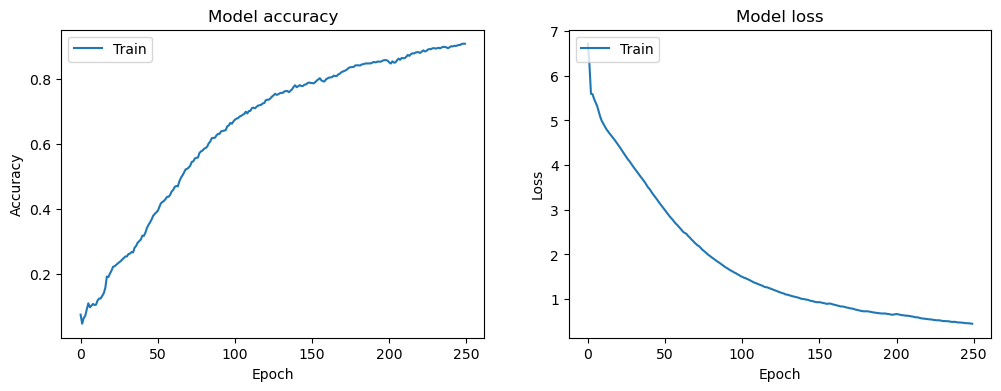

In [24]:
# Visualization of training loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()

In [25]:
# Response generation function
def generate_response(user_input):
    tokenized_user_input = tokenizer.texts_to_sequences([user_input])
    padded_user_input = pad_sequences(tokenized_user_input, maxlen=max_sequence_length, padding='post')
    states_value = encoder_model.predict(padded_user_input)

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tokenizer.word_index['start']

    decoded_sentence = ''
    while True:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tokenizer.index_word[sampled_token_index]

        if sampled_word == 'end' or len(decoded_sentence.split()) >= max_sequence_length - 1:
            break
        decoded_sentence += ' ' + sampled_word

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return decoded_sentence.strip()

# Chatbot interaction loop
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        print("Chatbot: Goodbye!")
        break
    response = generate_response(user_input)
    print("Chatbot:", response)

You: hi
1/1 [==============================] - 0s 56ms/step
Chatbot: how are you
You: Do you dream?
1/1 [==============================] - 0s 48ms/step
Chatbot: as an ai i don't dream i process data and provide responses based on algorithms
You: What is blockchain?
1/1 [==============================] - 0s 40ms/step
Chatbot: blockchain is a system of recording information in a way that makes it difficult or other loans
You: What is inflation?
1/1 [==============================] - 0s 43ms/step
Chatbot: inflation is the rate at which the general level of prices for goods and services is a fixed interest rate
You: What is a depression?
1/1 [==============================] - 0s 49ms/step
Chatbot: a subsidy is a benefit given by the government to groups or individuals usually in the form of a cash payment or other loans
You: What are derivatives?
1/1 [==============================] - 0s 41ms/step
Chatbot: derivatives are financial ratio is the total number of money that a country's govern

In [26]:
test_questions = [
    "What is AI?",
    "What is the stock market?",
    "What is interest?",
    "What languages do you speak?",
    "Can you write poems?"
]

reference_answers = [
    "AI, or artificial intelligence, is the simulation of human intelligence processes by machines.",
    "The stock market is a collection of markets where stocks are bought and sold.",
    "Interest is the charge for the privilege of borrowing money, typically expressed as an annual percentage rate.",
     "I speak many languages, including Python, Java, and JavaScript.",
    "I can try writing poems. Roses are red, violets are blue, ask me a question, and I'll answer you!"
    
]


In [27]:
def generate_response_for_testing(question):
    tokenized_question = tokenizer.texts_to_sequences([question])
    padded_question = pad_sequences(tokenized_question, maxlen=max_sequence_length, padding='post')
    states_value = encoder_model.predict(padded_question)

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tokenizer.word_index['start']

    decoded_sentence = ''
    while True:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tokenizer.index_word.get(sampled_token_index, '')

        if sampled_word == 'end' or len(decoded_sentence.split()) >= max_sequence_length - 1:
            break
        decoded_sentence += ' ' + sampled_word

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return decoded_sentence.strip()


In [28]:
from rouge import Rouge

def evaluate_chatbot_performance(test_questions, reference_answers):
    rouge = Rouge()
    for question, reference_answer in zip(test_questions, reference_answers):
        generated_response = generate_response_for_testing(question)
        scores = rouge.get_scores(generated_response, reference_answer)
        print(f"Question: {question}")
        print(f"Generated Response: {generated_response}")
        print(f"Reference Answer: {reference_answer}")
        print(f"ROUGE Scores: {scores}\n")

evaluate_chatbot_performance(test_questions, reference_answers)


1/1 [==============================] - 0s 48ms/step
Question: What is AI?
Generated Response: ai or artificial intelligence is the simulation of human intelligence processes by machines
Reference Answer: AI, or artificial intelligence, is the simulation of human intelligence processes by machines.
ROUGE Scores: [{'rouge-1': {'r': 0.8461538461538461, 'p': 0.9166666666666666, 'f': 0.879999995008}, 'rouge-2': {'r': 0.75, 'p': 0.75, 'f': 0.749999995}, 'rouge-l': {'r': 0.8461538461538461, 'p': 0.9166666666666666, 'f': 0.879999995008}}]

1/1 [==============================] - 0s 52ms/step
Question: What is the stock market?
Generated Response: the pacific ocean is the total amount of money that borrows the most famous landmarks in the world
Reference Answer: The stock market is a collection of markets where stocks are bought and sold.
ROUGE Scores: [{'rouge-1': {'r': 0.14285714285714285, 'p': 0.13333333333333333, 'f': 0.1379310294887041}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l':